# Market Basket Analysis 2

### Install package

In [1]:
# ! pip install mlxtend --upgrade

### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

### Load data

Dataset reference: http://archive.ics.uci.edu/ml/datasets/Online+Retail

Dataset contains transnational transactions made on a UK-based online retail store between 01/12/2010 and 09/12/2011.  
It comprises 541909 rows, with 8 attributes:
* InvoiceNo: a unique 6-digit number assigned to each transaction. If this code starts with the letter ‘C’, then the order was canceled.
* StockCode: a unique 5-digit number assigned to each distinct product.
* Description: the product name.
* Quantity: The number of each product (item) purchased per transaction.
* InvoiceDate: the date and time each transaction was completed.
* UnitPrice: the product price per unit in pounds sterling.
* CustomerID: a unique 5-digit number assigned to each customer.
* Country: the name of the country from where the purchase was made.

In [3]:
df = pd.read_csv('data/Online Retail.csv')
df.shape

(541909, 8)

### Examine data

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Prepare data

In [6]:
# Check for missing values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Since we have sufficient data for data analysis, let's drop rows with any nulls

In [7]:
# Drop all rows with a null value
df.dropna(inplace=True)
df.shape

(406829, 8)

In [8]:
# Delete canceled transactions

# Convert the InvoiceNo column to string
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

# Remove rows where InvoiceNo starts with a 'C'
df = df[~df['InvoiceNo'].str.startswith('C')]

df.shape

(397924, 8)

Review transactions distribution by country

In [9]:
# Sum transactions per country (only top 5)
top5 = df['Country'].value_counts().head(5)
top5

United Kingdom    354345
Germany             9042
France              8342
EIRE                7238
Spain               2485
Name: Country, dtype: int64

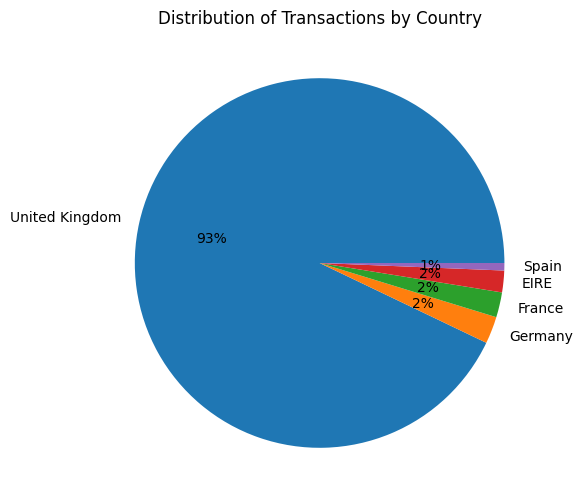

In [10]:
# Create a pie chart to show distribution of transactions by country
plt.figure(figsize=[6,6])
plt.pie(top5, labels=top5.index, autopct = '%0.0f%%', labeldistance=1.1)
plt.title('Distribution of Transactions by Country')
plt.show()

Since most of the transactions are from the UK, let's limit our analysis to UK only

In [11]:
df = df[df['Country'] == 'United Kingdom']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


To prepare data for Market Basket Analysis, we need to:
* group the data by InvoiceNo and Description
* sum the values, and
* change the index to InvoiceNo

In [12]:
%%time

# Group, sum, unstack and set index of dataframe
basket = df.groupby(['InvoiceNo','Description'])['Quantity'] \
                    .sum().unstack().reset_index().fillna(0) \
                    .set_index('InvoiceNo')
basket.shape

CPU times: user 1.55 s, sys: 1.05 s, total: 2.6 s
Wall time: 2.2 s


(16649, 3844)

In [13]:
basket.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
basket.loc['536367']['ASSORTED COLOUR BIRD ORNAMENT']

32.0

In [15]:
basket.loc['536375']['WHITE METAL LANTERN']

6.0

The cells above represent the quanitity of each item purchased. For the purposes of this notebook, we are only interested if an item was purchased or not, regardless of quantity.  
Therefore, let's encode any value above zero to True and the rest to False.

In [16]:
%%time

# Create function to encode the values
def encode_values(x):
    if x > 0:
        return True
    else:
        return False

# Apply function to data
basket_encoded = basket.applymap(encode_values)
basket_encoded.shape

CPU times: user 11.1 s, sys: 160 ms, total: 11.2 s
Wall time: 11.5 s


(16649, 3844)

In [17]:
basket_encoded.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536369,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [18]:
basket_encoded.loc['536367']['ASSORTED COLOUR BIRD ORNAMENT']

True

In [19]:
basket_encoded.loc['536375']['WHITE METAL LANTERN']

True

In [20]:
# Filter invoices to keep only tranactions with 2 or more separate items purchased
basket_filtered = basket_encoded[(basket_encoded > 0).sum(axis=1) >= 2]
basket_filtered.shape

(15376, 3844)

In [21]:
basket_filtered.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536372,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Execute apriori algorithm

We will apply the apriori algorithm to find the most frequently purchased items in the dataset. For our minimum support value, we will specify 3%, which means only items whose frequency of occurrence in the data is at least 3% will be returned.

In [22]:
# Generate the frequent itemsets
frequent_itemsets = apriori(basket_filtered, min_support=0.03, use_colnames=True) \
                            .sort_values('support', ascending=False)
frequent_itemsets.shape

(108, 2)

In [23]:
frequent_itemsets.head(10)

,support,itemsets
99,0.121358,(WHITE HANGING HEART T-LIGHT HOLDER)
44,0.093197,(JUMBO BAG RED RETROSPOT)
80,0.090466,(REGENCY CAKESTAND 3 TIER)
6,0.084417,(ASSORTED COLOUR BIRD ORNAMENT)
71,0.082986,(PARTY BUNTING)
58,0.072841,(LUNCH BAG RED RETROSPOT)
86,0.064971,(SET OF 3 CAKE TINS PANTRY DESIGN )
52,0.064646,(LUNCH BAG BLACK SKULL.)
69,0.061004,(PAPER CHAIN KIT 50'S CHRISTMAS )
64,0.060939,(NATURAL SLATE HEART CHALKBOARD )


From the results, “White hanging Heart T-Light Holder” is the most frequently purchased item with a support value of 0.121358, meaning it was purchased in 12% of all transactions.

### Generate association rules

The final step in our analysis is to generate the rules with their corresponding support, confidence, and lift. From this, we can extract useful information about which items are more likely to be purchased together.

In [24]:
# Apply association rules
assoc_rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1) \
                                .sort_values('lift', ascending=False).reset_index(drop=True)

In [25]:
assoc_rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.061874,0.061874,0.031494,0.544555,9.684756,0.027649,2.326678,0.936160
std,0.017608,0.017608,0.000931,0.148681,4.974696,0.001120,0.985138,0.032835
min,0.039802,0.039802,0.030632,0.353105,6.684737,0.026620,1.464412,0.898124
25%,0.050485,0.050485,0.030876,0.429241,6.698359,0.026731,1.643040,0.915207
50%,0.059866,0.059866,0.031217,0.521501,7.168543,0.027384,1.947813,0.928477
75%,0.072841,0.072841,0.031835,0.644815,10.154941,0.028302,2.626352,0.949358
max,0.093197,0.093197,0.032908,0.777778,17.717202,0.029210,4.302452,0.986881


In [26]:
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.043900,0.039802,0.030957,0.705185,17.717202,0.029210,3.256952,0.986881
1,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.039802,0.043900,0.030957,0.777778,17.717202,0.029210,4.302452,0.982670
2,(LUNCH BAG RED RETROSPOT),(LUNCH BAG PINK POLKADOT),0.072841,0.055086,0.030632,0.420536,7.634188,0.026620,1.630668,0.937283
3,(LUNCH BAG PINK POLKADOT),(LUNCH BAG RED RETROSPOT),0.055086,0.072841,0.030632,0.556080,7.634188,0.026620,2.088574,0.919671
4,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.052680,0.093197,0.032908,0.624691,6.702899,0.027999,2.416152,0.898124
5,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.093197,0.052680,0.032908,0.353105,6.702899,0.027999,1.464412,0.938253
6,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.064646,0.072841,0.031478,0.486922,6.684737,0.026769,1.807051,0.909181
7,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.072841,0.064646,0.031478,0.432143,6.684737,0.026769,1.647164,0.917216


Based on the results from implementing association rules, we see that “Roses Regency Teacup and Saucer” and “Green Regency Teacup and Saucer” have the highest “lift” value, and therefore the highest association of any two products. With a combined support of 0.0309, it means both items were purchased together in 3.09% of all transactions.